# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

## Task 1 : Prediction Using Supervised ML

### In this task we have to predict the percentage score of the student based on the number of hours studied. The rask has two variables where the feature is the no. of hours studied and the target value is the percentage score. This can sloved using simple linear regression

### Data Source : http://bit.ly/w-data

### Demonstrated and Performed by : Sarika Chaturvedi | sarikachaturvedi236@gmail.com

In [48]:
# Importing  required libriraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

### Reading the data from remote URL

In [49]:
# Loading the dataset from provided link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)


### Exploring Dataset

In [50]:
print("Dataset imported successfully")
data.head()

Dataset imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [51]:
data.shape

(25, 2)

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [53]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [54]:
data.corr() #correlation coefficient

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Outlier Check

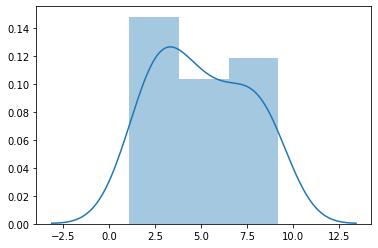

In [39]:
# X = Hours
sns.distplot(X)


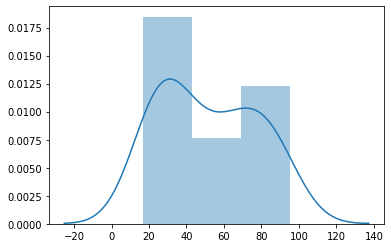

In [12]:
# Y = Scores
sns.distplot(Y)

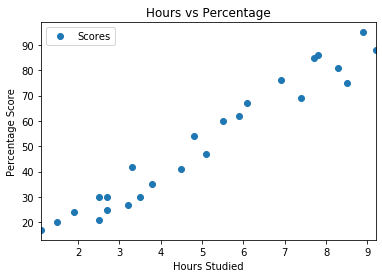

In [64]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores',style = 'o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Linear Regression

**Train -Test Split**

In [14]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1:].values

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.2, random_state=10)

**Training the Simple Linear Regression model on the Training set**

Model set divided into two parts Training or Test Dataset 

80% data into training dataset or left 20% into testing dataset

In [16]:
from sklearn.linear_model import LinearRegression  
LR = LinearRegression()  
LR.fit(X_train, Y_train) 

print("Training complete.")

Training complete.


##### sklearn does is find the sum of predective or actual value is minimum

## Performing Simple Linear Regression

#### Calculating the coefficients of the simple linear regression equation: y = mx + c (m: slope, c: y_intercept)

In [17]:
m = LR.coef_
m

array([[9.81430544]])

In [18]:
c = LR.intercept_
c

array([2.64996519])

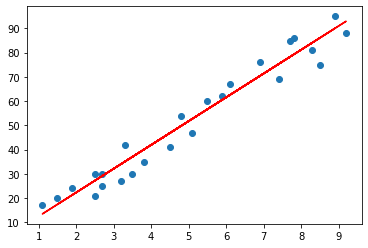

In [69]:
# Plotting the regression line
line = m * X + c

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line,color= 'RED')
plt.show()

### Making Predictions

In [20]:
print(X_test) # Testing data - In Hours
Y_pred = LR.predict(X_test) # Predicting the scores

[[1.5]
 [5.1]
 [3.3]
 [3.2]
 [4.5]]


In [21]:
Y_test

array([[20],
       [47],
       [42],
       [27],
       [41]], dtype=int64)

In [22]:
Y_pred

array([[17.37142335],
       [52.70292295],
       [35.03717315],
       [34.05574261],
       [46.81433968]])

In [23]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': Y_test.flatten(), 'Predicted': Y_pred.flatten()})  
df 


,Actual,Predicted
0,20,17.371423
1,47,52.702923
2,42,35.037173
3,27,34.055743
4,41,46.814340


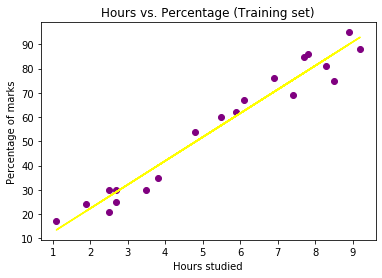

In [35]:
#Visualising the Training set results
plt.scatter(X_train, Y_train, color = 'purple')
plt.plot(X_train, LR.predict(X_train), color = 'yellow')
plt.title('Hours vs. Percentage (Training set)')
plt.xlabel('Hours studied')
plt.ylabel('Percentage of marks')
plt.show()


### Prediction for given problem statement

In [45]:
def LR_prediction(Hour):
    Score = m*Hour + c
    return Score

In [46]:
prediction = LR_prediction(9.25)
print("If the student studies for 9.25 hours/day, the score is %.4f" %prediction)

If the student studies for 9.25 hours/day, the score is 93.4323


### Error Metrics

In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 5.632881746692995


### Root Mean Square Error 

In [47]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(Y_test,Y_pred))

The R-Square of the model is:  0.6683995499740194


## Conclusion

We used a Linear Regression Model to predict the percentage score of a student, if they studies for 9.25 hours/day, and the score came out to be 93.41%